# Rock, Paper, Scissors or...

## People can't do random

The NY Times created [a Rock, Paper, Scissors bot](http://www.nytimes.com/interactive/science/rock-paper-scissors.html?_r=0). If you try it, chances are it'll win handily. This is because, no matter how hard you try, you're going to fall into patterns that the computer is going to be able to identify and then exploit.

As the article notes, if you were capable of producing truly random throws, then on average you'd win about as much as you lose, but humans are really bad at acting truly randomly. 

For instance, what would you bet are the odds that in 100 rock/paper/scissors throws that a random bot would throw 4 in a row at some point? People I've asked vary wildly in their guesses, but almost none of them guessed as high as the true answer (92%). Even 5 in a row is likely to happen more than half the time. 

I haven't conducted the study, but I would bet that the percentage of humans who would throw 4 in a row when trying to be random would be really small. 

How to calculate the probability of a streak of length N after some number of throws? Read on...

In [43]:
import numpy as np
from numpy.linalg import matrix_power
import matplotlib.pyplot as plt

%matplotlib inline

## How to compute the probabilities

How do we compute the probability of 4 in a row in a stream of 100 throws? Here's one way:

After each throw, the possible states we might be in are: a streak of length 1, a streak of length 2, a streak of length 3. If we ever get a streak of length 4, then we don't care what happens next, so we'll let the 4th state just be "I've seen a streak of length 4 at some point already". 

Given those 4 states, we can create the transition matrix between them, which has a simple structure: With probability 2/3, if we're at a streak of length 1,2 or 3, we'll throw something different and go back to a streak of length 1. Or with probability 1/3 we'll increase our streak length by 1. (And of course if we ever reach the fourth state, we just stay there. 

In [49]:
def transition_matrix(streak_length):
    """ TM[i,j] = Prob[transitioning to streak length i from streak length j]"""
    tm = np.zeros((streak_length, streak_length))
    tm[0,0:streak_length-1] = 2/3.0
    tm[1:streak_length, 0:streak_length-1] = np.eye(streak_length-1) * 1/3.0
    tm[streak_length-1, streak_length-1] = 1.0
    return np.matrix(tm)

tm = transition_matrix(4); tm

matrix([[ 0.66666667,  0.66666667,  0.66666667,  0.        ],
        [ 0.33333333,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.33333333,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.33333333,  1.        ]])

After 1 throw, obviously we're in state 1, and so the vector [1,0,0,0]' represents the probabilities of being in the various states after that first toss.

Then, if we multiply that vector by the transition matrix **tm**, the vector now represents the probability of being in each state after the second throw. 

In [46]:
starting_vec = np.matrix([1,0,0,0]).transpose()
tm * starting_vec

matrix([[ 0.66666667],
        [ 0.33333333],
        [ 0.        ],
        [ 0.        ]])

To determine the probability after N throws, we just multiply that starting vector by the matrix N-1 times. 

In [47]:
def prob_of_run(streak_length, num_throws):
    starting_vec = np.zeros((streak_length,1))
    starting_vec[0] = 1.0
    tm_n = matrix_power(transition_matrix(streak_length), num_throws - 1)
    return (tm_n * starting_vec)[streak_length-1, 0]

and we can now calculate the probabilities for various streak lengths...

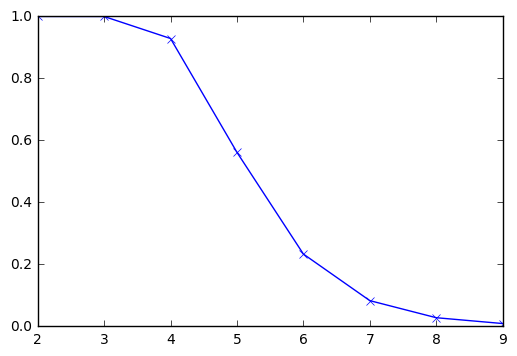

In [48]:
streak_lengths = range(2,10)
num_throws = 100
probs = [prob_of_run(i, num_throws) for i in streak_lengths]

plt.plot(streak_lengths, probs, 'bx-')